### Importing Libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [253]:
market = pd.read_csv("supermarket_sales - Sheet1.csv")

In [254]:
market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Cleaning 

In [255]:
market.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [256]:
market.duplicated().sum()

0

In [257]:
market.drop("Invoice ID", axis=1,inplace=True)

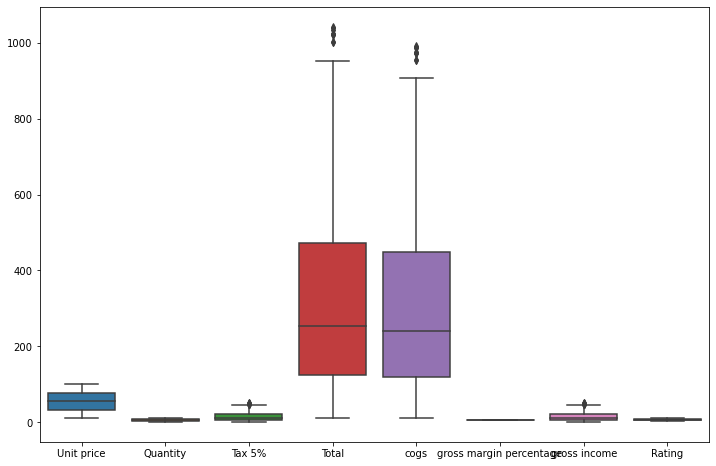

In [258]:
plt.figure(figsize=(12,8))
sns.boxplot(data=market);

In [259]:
def Outliers(col):
    Median = market[col].quantile(0.50)
    Max = market[col].quantile(0.95)
    market[col] = np.where(market[col]>Max, Median,market[col])
    return market[col]

In [260]:
Outliers("Total")
Outliers("cogs")
Outliers("Tax 5%")

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    12.0880
997     1.5920
998     3.2910
999    30.9190
Name: Tax 5%, Length: 1000, dtype: float64

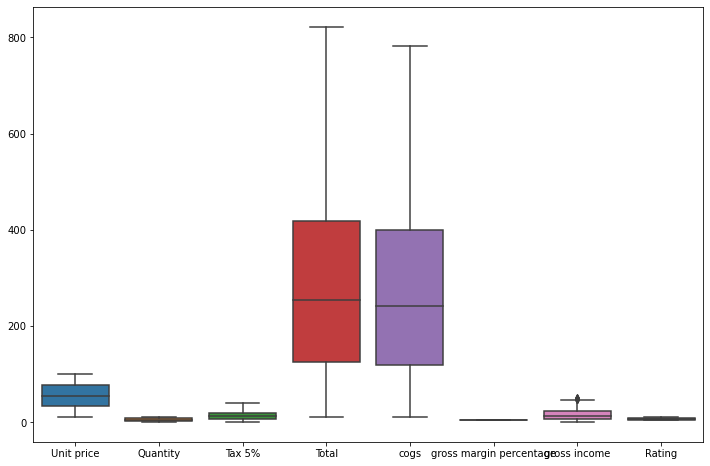

In [261]:
plt.figure(figsize=(12,8))
sns.boxplot(data=market);

### EDA

In [262]:
branches = market.Branch.value_counts()
branches

A    340
B    332
C    328
Name: Branch, dtype: int64

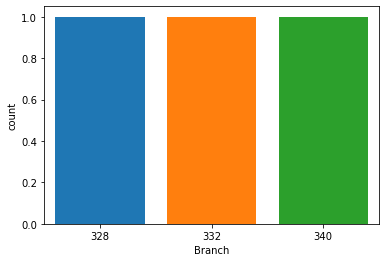

In [263]:
sns.countplot(data=market,x=branches, saturation=True);

as we see, 3 branches are approximately equal

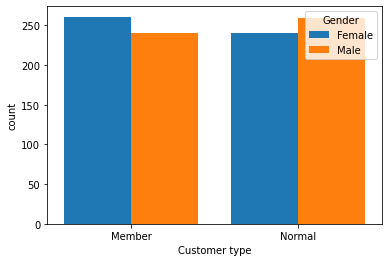

In [264]:
sns.countplot(data = market,x="Customer type", hue="Gender",saturation=True);

Females are more than in Mamber type, and the opposite in Normal type.

In [265]:
pro_line = market["Product line"].value_counts()
pro_line

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

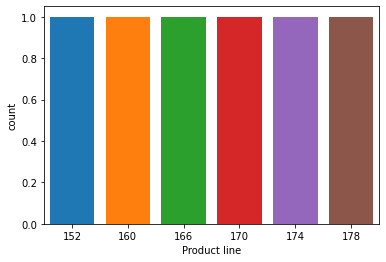

In [266]:
sns.countplot(data=market, x=pro_line,saturation=True);

### we notice in first 5 raws that the gross_income column values approximately equl to Tax_5% column values,
### let's make sure..

In [267]:
equal = market["gross income"] == market["Tax 5%"]
equal.value_counts()

True     950
False     50
dtype: int64

ok not equal then we not drop one of them

### which payment type most used in every city?

In [268]:
market["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [269]:
most_payment_type_in_cities = market.groupby("City")["Payment"].count()
most_payment_type_in_cities

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Payment, dtype: int64

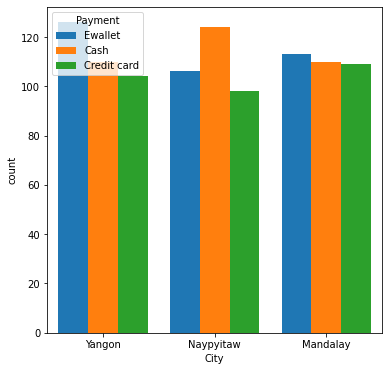

In [270]:
plt.figure(figsize=(6,6))
sns.countplot(data=market,x="City",hue="Payment",saturation=True);

Ewallet in Yangon & cash in Naypyitaw & Ewallet in Mandalay

In [271]:
px.bar(market,x='City',y='Total',color='City',animation_frame='Date',title='Change the date to see the differnce in the Total price of Country ',
      animation_group="Branch", range_y=[0,1000])

### model preparing

In [272]:
Col_list = list(market.columns)

In [273]:
Cat_list = []
for col in Col_list:
    if market[col].dtype == "object":
        Cat_list.append(col)

In [274]:
from sklearn.preprocessing import LabelEncoder

In [275]:
#used to transform non-numerical labels (as long as they arehashable and comparable) to numerical labels.
L_E = LabelEncoder()

In [276]:
for i in Cat_list:
     market[i] = L_E.fit_transform(market[i])
# fit_transform: Fit label encoder and return encoded labels.

In [277]:
X = market.drop("Gender",axis=1)
y = market["Gender"]

In [278]:
market.shape

(1000, 16)

In [280]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size =0.2)

In [281]:
len(x_train)

800

In [282]:
len(x_test)

200


### ML model

In [286]:
from sklearn.svm import SVC #supervised learning methods used for classification, regression and outliers detection.
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error

In [287]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [288]:
y_pred = svc.predict(x_test)

In [290]:
accuracy_score(y_test,y_pred)*100

54.0

In [291]:
confusion_matrix(y_test,y_pred)

array([[68, 32],
       [60, 40]], dtype=int64)

In [293]:
mean_squared_error(y_test,y_pred)*100

46.0

In [297]:
svc.score(x_train,y_train)*100

54.37499999999999

it's a bad algorithm for this prediction, let's try another one

In [304]:
from sklearn.ensemble import RandomForestClassifier

In [305]:
R_F_C = RandomForestClassifier()
R_F_C.fit(x_train,y_train)

RandomForestClassifier()

In [306]:
y_pred1 = R_F_C.predict(x_test)

In [309]:
accuracy_score(y_test,y_pred1)*100

49.5

In [314]:
confusion_matrix(y_test,y_pred1)

array([[51, 49],
       [52, 48]], dtype=int64)

In [310]:
mean_squared_error(y_test,y_pred1)*100

50.5

In [312]:
R_F_C.score(x_train,y_train)*100

100.0